<a href="https://colab.research.google.com/github/jwang2503-dev/Mat-420/blob/main/Mat_420_lesson_6_dataset_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("06-RollingRegCarSales.csv")
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


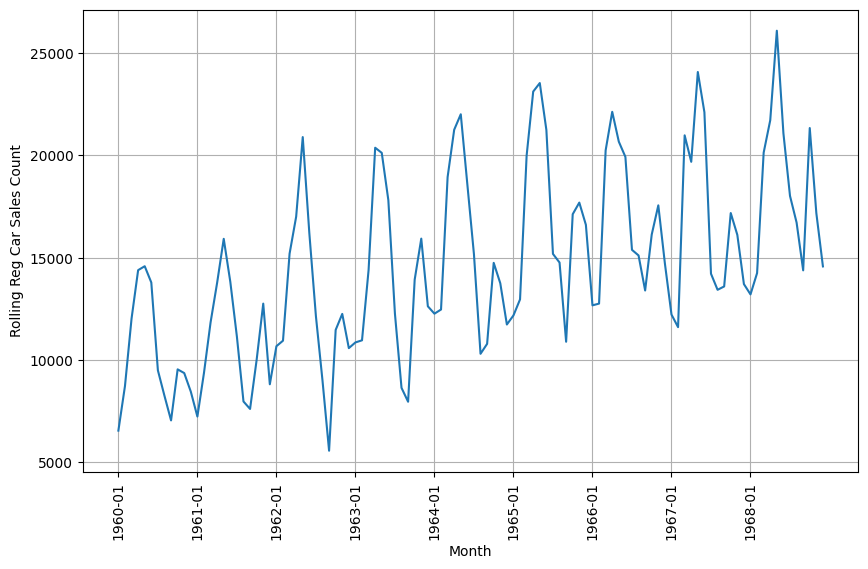

In [6]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Rolling Reg Car Sales Count")

plt.plot(data['Month'], data['Sales'])
plt.xticks(data['Month'][::12],  rotation='vertical')
plt.grid()
plt.show()

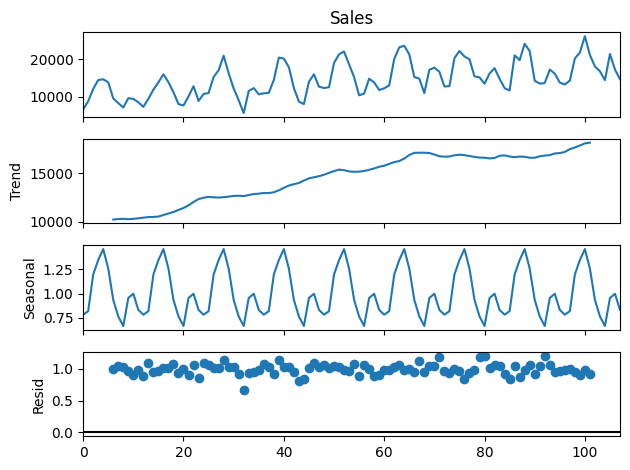

In [7]:
decom=seasonal_decompose(data.iloc[:,1],model='multiplicative', period=12)
decom.plot()
plt.show()

In [8]:
X,y=[], []
lag=18
for i in range(len(data)-lag-1):
  X.append(data.iloc[i:i+lag,1])
  y.append(data.iloc[i+lag,1])
X=np.squeeze(X)
y=np.squeeze(y)
X[0], y[0]

(array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
         9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821]),
 np.int64(11143))

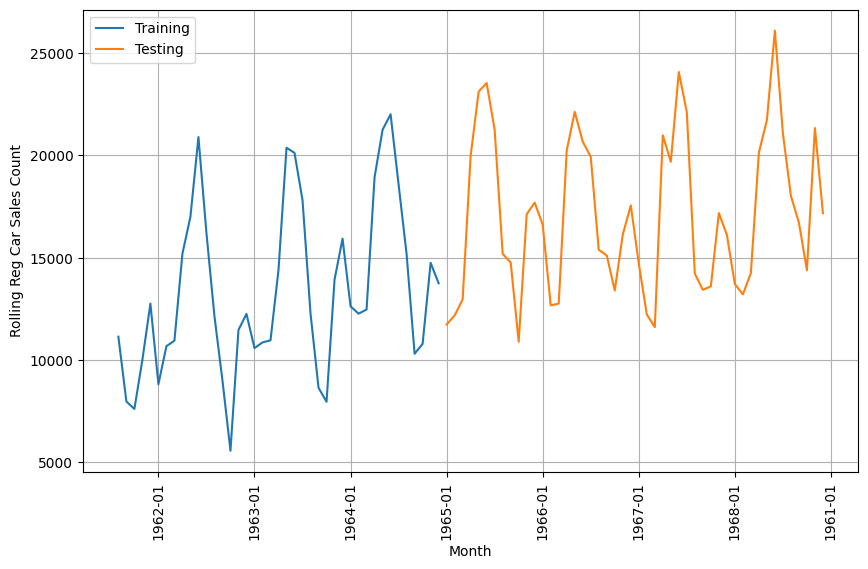

In [9]:
split_idx=48
x_train, y_train, x_test, y_test=X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Rolling Reg Car Sales Count")

plt.plot(data['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(data['Month'][-split_idx:],y_test, label='Testing')
plt.xticks(data['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.grid()
plt.show()

In [10]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [11]:
predictingset=[x for x in x_train[-1]]
y_pred=[]
for i in range(len(x_test)):
    pred=regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset=predictingset[1:]
y_pred

[np.float64(16037.948165609443),
 np.float64(13660.58983160166),
 np.float64(12318.6110809625),
 np.float64(14074.0797096601),
 np.float64(19532.78020936667),
 np.float64(23654.765517916196),
 np.float64(22042.832280007962),
 np.float64(20010.206517239494),
 np.float64(14088.601451755925),
 np.float64(10979.644481976327),
 np.float64(11197.903619584222),
 np.float64(15389.344784094483),
 np.float64(15709.0221510784),
 np.float64(14014.400505124539),
 np.float64(12275.224745436664),
 np.float64(14605.709670623723),
 np.float64(20951.840692793892),
 np.float64(24290.051429109335),
 np.float64(23392.996675541937),
 np.float64(19604.34569441204),
 np.float64(14138.009201210321),
 np.float64(10367.365067653333),
 np.float64(12420.823171994844),
 np.float64(14836.260817256622),
 np.float64(16116.650029223973),
 np.float64(13524.80362053351),
 np.float64(12355.777978878428),
 np.float64(15223.61156190492),
 np.float64(22044.656909349127),
 np.float64(25269.527419253776),
 np.float64(24092.521

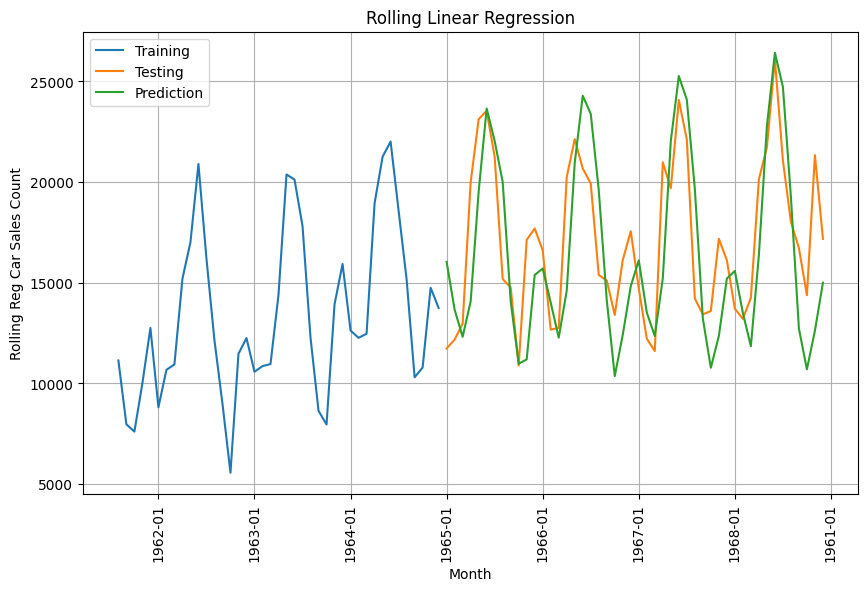

In [13]:
plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Rolling Reg Car Sales Count")

plt.plot(data['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(data['Month'][-split_idx:],y_test, label='Testing')
plt.plot(data['Month'][-split_idx:],y_pred, label='Prediction')
plt.xticks(data['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

In [14]:
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: 0.30
Test RMSE: 3240.564


In [18]:
y_hat_rm = data.copy()
ma_window = 4
y_hat_rm['RollingMean'] = data['Sales'].rolling(ma_window).mean()
y_hat_rm.dropna(inplace=True)
y_hat_rm

,Month,Sales,RollingMean
3,1960-04,14395,10424.75
4,1960-05,14587,12434.00
5,1960-06,13791,13699.75
6,1960-07,9498,13067.75
7,1960-08,8251,11531.75
...,...,...,...
103,1968-08,16722,20482.25
104,1968-09,14385,17553.75
105,1968-10,21342,17618.25
106,1968-11,17180,17407.25


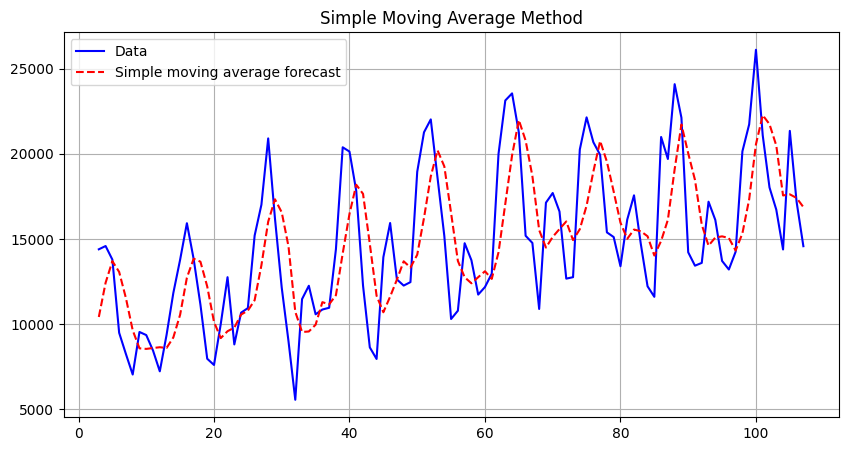

In [19]:
plt.figure(figsize=(10,5))

plt.plot(y_hat_rm['Sales'],label='Data',color='blue')
plt.plot(y_hat_rm['RollingMean'], label='Simple moving average forecast',linestyle='--', color='red')
plt.legend()
plt.title('Simple Moving Average Method')
plt.grid()
plt.show()

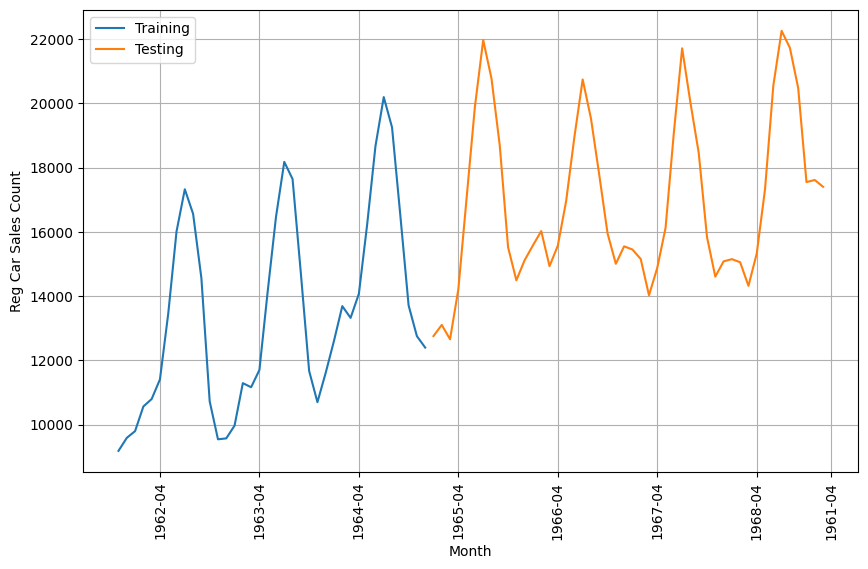

In [20]:
X,y=[], []
lag=18
for i in range(len(y_hat_rm)-lag-1):
  X.append(y_hat_rm.iloc[i:i+lag,2])
  y.append(y_hat_rm.iloc[i+lag,2])
X=np.squeeze(X)
y=np.squeeze(y)

split_idx=48
x_train, y_train, x_test, y_test=X[:-split_idx], y[:-split_idx], X[-split_idx:], y[-split_idx:]

plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Reg Car Sales Count")

plt.plot(y_hat_rm['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(y_hat_rm['Month'][-split_idx:],y_test, label='Testing')
plt.xticks(y_hat_rm['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.grid()
plt.show()

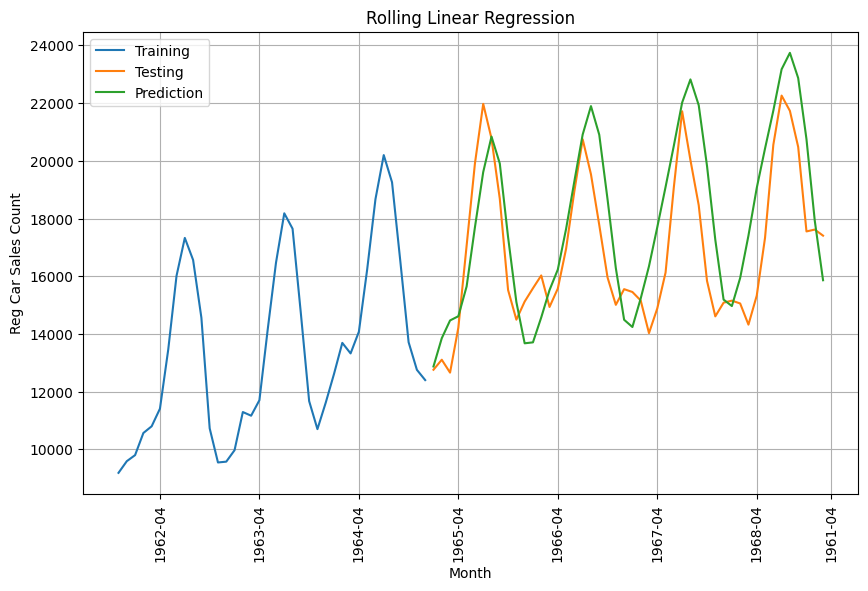

In [21]:
regr = LinearRegression()
regr.fit(x_train, y_train)

predictingset=[x for x in x_train[-1]]
y_pred=[]
for i in range(len(x_test)):
    pred=regr.predict([predictingset])
    y_pred.append(pred[0])
    predictingset.append(pred[0])
    predictingset=predictingset[1:]



plt.figure(figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Reg Car Sales Count")

plt.plot(y_hat_rm['Month'][lag+1:-split_idx],y_train, label='Training')
plt.plot(y_hat_rm['Month'][-split_idx:],y_test, label='Testing')
plt.plot(y_hat_rm['Month'][-split_idx:],y_pred, label='Prediction')
plt.xticks(y_hat_rm['Month'][lag-6::12],  rotation='vertical')
plt.legend()
plt.title('Rolling Linear Regression')
plt.grid()
plt.show()

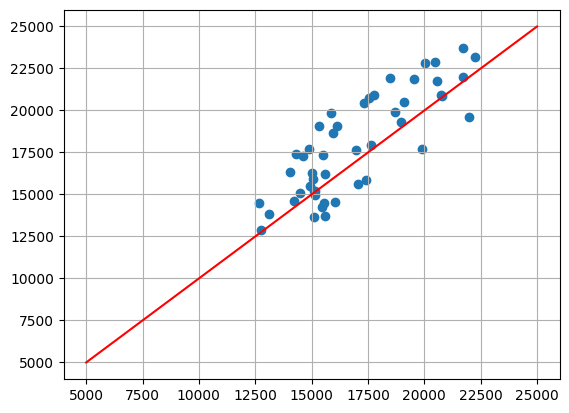

In [30]:
xv=np.linspace(5000,25000,50000)
plt.plot(xv,xv, 'r')

plt.scatter(y_test,y_pred)

plt.grid()
plt.show()

In [31]:
train=pd.DataFrame(data.iloc[:-split_idx,1])
test=pd.DataFrame(data.iloc[-split_idx :,1])
test.reset_index(inplace=True,drop=True)

In [32]:
result = adfuller(train)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Interpret the results
if result[1] > 0.05:
    print("The data is not stationary.")
else:
    print("The data is stationary.")

ADF Statistic: -0.018820196492133987
p-value: 0.9569477179511179
The data is not stationary.


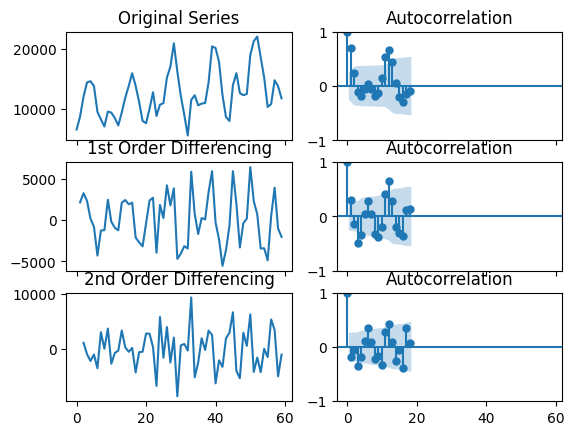

In [33]:
traindf=pd.DataFrame(train)

# Original Series
fig, ax = plt.subplots(3, 2, sharex=True)
ax[0, 0].plot(traindf); ax[0, 0].set_title('Original Series')
plot_acf(traindf, ax=ax[0, 1])

# 1st Differencing
ax[1, 0].plot(traindf.diff()); ax[1, 0].set_title('1st Order Differencing')
plot_acf(traindf.diff().dropna(), ax=ax[1, 1])

# 2nd Differencing
ax[2, 0].plot(traindf.diff().diff()); ax[2, 0].set_title('2nd Order Differencing')
plot_acf(traindf.diff().diff().dropna(), ax=ax[2, 1])

plt.show()

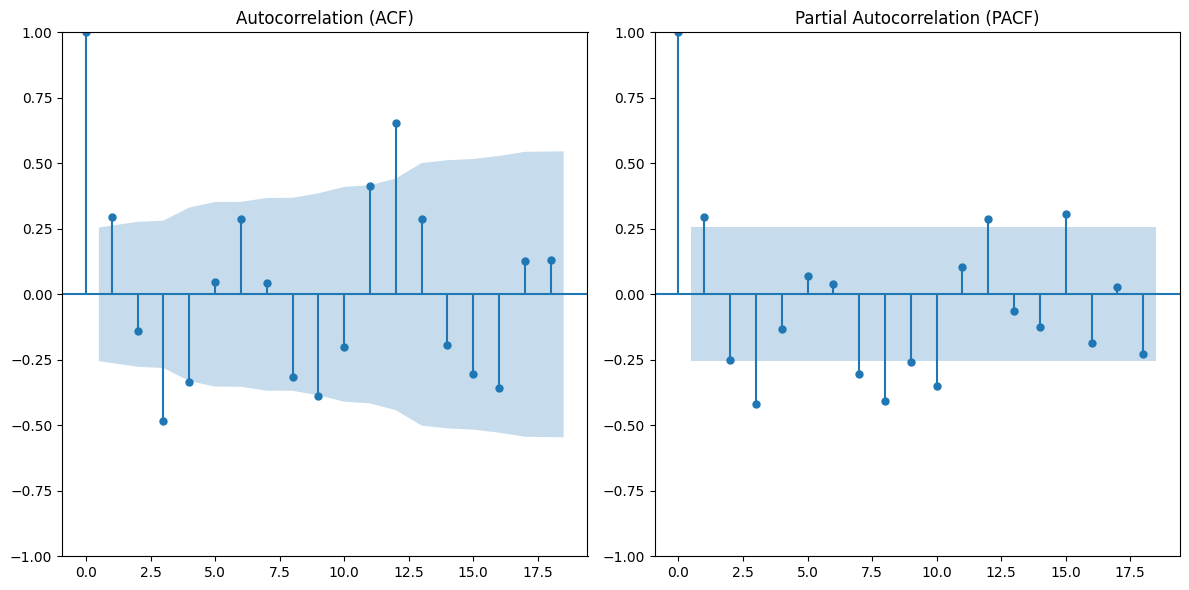

In [34]:
# Plot ACF and PACF for differenced data
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(traindf.diff().dropna(), ax=plt.gca())
plt.title("Autocorrelation (ACF)")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(traindf.diff().dropna(), ax=plt.gca())
plt.title("Partial Autocorrelation (PACF)")

plt.tight_layout()
plt.show()

In [44]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -552.317
Date:                Sun, 28 Sep 2025   AIC                           1110.635
Time:                        22:14:53   BIC                           1116.867
Sample:                             0   HQIC                          1113.068
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1365      0.454      0.301      0.763      -0.752       1.025
ma.L1          0.2015      0.471      0.427      0.669      -0.723       1.125
sigma2      8.353e+06   1.76e+06      4.743      0.0

In [46]:
history = [x for x in train['Sales']]
predictions = []
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.iloc[t][-1]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))

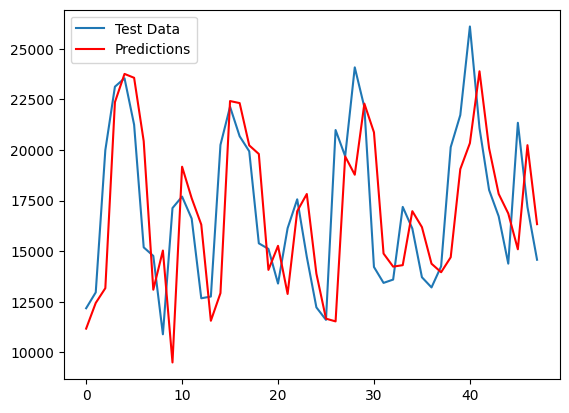

In [47]:
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()

In [48]:
print('Coefficient of determination: %.2f' % r2_score(test, predictions))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Coefficient of determination: 0.13
Test RMSE: 3543.452


In [50]:
model = ARIMA(train, seasonal_order=(2,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:                    Sales   No. Observations:                   60
Model:             ARIMA(2, 1, [1], 12)   Log Likelihood                -419.404
Date:                  Sun, 28 Sep 2025   AIC                            846.808
Time:                          22:18:08   BIC                            854.293
Sample:                               0   HQIC                           849.636
                                   - 60                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5547      0.165      3.354      0.001       0.231       0.879
ar.S.L24       0.2510      0.076      3.321      0.001       0.103       0.399
ma.S.L12      -0.5943      0.188    

In [52]:
history = [x for x in train['Sales']]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test.iloc[t][-1]
	history.append(obs)

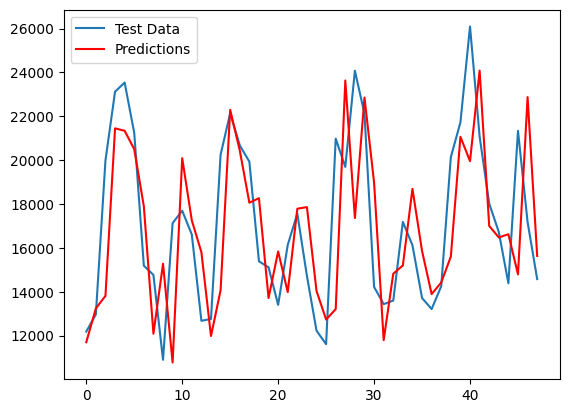

In [53]:
plt.plot(test, label='Test Data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend()
plt.show()

In [54]:
print('Coefficient of determination: %.2f' % r2_score(test, predictions))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Coefficient of determination: 0.24
Test RMSE: 3320.266
